# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
lat = 0
lon = 0

url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"
city_url = url + "&q=" + city
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=b2b8e478ae5230ea057b964bead7c3ee&q=avarua'

In [4]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -159.775, 'lat': -21.2078},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 22.03,
  'feels_like': 22.19,
  'temp_min': 22.03,
  'temp_max': 22.03,
  'pressure': 1017,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 2.57, 'deg': 140},
 'rain': {'1h': 0.11},
 'clouds': {'all': 98},
 'dt': 1684344201,
 'sys': {'type': 1,
  'id': 7271,
  'country': 'CK',
  'sunrise': 1684342989,
  'sunset': 1684382884},
 'timezone': -36000,
 'id': 4035715,
 'name': 'Avarua',
 'cod': 200}

In [5]:
# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("----------------")


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,"Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")
        

Beginning Data Retrieval
----------------
Processing Record 1 of Set 1 | al jawf
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | vredenburg
City not found. Skipping ...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | breckenridge
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | soe
Processing Record 10 of Set 1 | bac lieu
Processing Record 11 of Set 1 | mexia
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | bahia blanca
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | hotan
Processing Record 17 of Set 1 | williamsburg
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | hailar
Processing Record 23 of Set 

Processing Record 39 of Set 4 | hammerfest
Processing Record 40 of Set 4 | urangan
Processing Record 41 of Set 4 | westport
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | klyuchi
Processing Record 45 of Set 4 | tura
Processing Record 46 of Set 4 | glasgow
Processing Record 47 of Set 4 | atar
Processing Record 48 of Set 4 | port mathurin
Processing Record 49 of Set 4 | vanimo
Processing Record 0 of Set 5 | sisimiut
Processing Record 1 of Set 5 | hadibu
Processing Record 2 of Set 5 | pangai
Processing Record 3 of Set 5 | vilyuysk
Processing Record 4 of Set 5 | goure
Processing Record 5 of Set 5 | puerto baquerizo moreno
Processing Record 6 of Set 5 | port moresby
Processing Record 7 of Set 5 | antofagasta
Processing Record 8 of Set 5 | lodwar
Processing Record 9 of Set 5 | bogdanovich
Processing Record 10 of Set 5 | potsdam
Processing Record 11 of Set 5 | el porvenir
Processing Record 12 of Set 5 | vingt cinq
City not f

Processing Record 29 of Set 8 | sinabang
Processing Record 30 of Set 8 | port augusta
Processing Record 31 of Set 8 | okha
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | road town
Processing Record 34 of Set 8 | marion
Processing Record 35 of Set 8 | ancud
Processing Record 36 of Set 8 | constantia
Processing Record 37 of Set 8 | san patricio
Processing Record 38 of Set 8 | san luis de la loma
Processing Record 39 of Set 8 | bedele
Processing Record 40 of Set 8 | sabang
Processing Record 41 of Set 8 | hedaru
Processing Record 42 of Set 8 | taro
Processing Record 43 of Set 8 | gryfino
Processing Record 44 of Set 8 | magong
Processing Record 45 of Set 8 | nantucket
Processing Record 46 of Set 8 | ust-tsilma
Processing Record 47 of Set 8 | impfondo
Processing Record 48 of Set 8 | kampung tanjung karang
Processing Record 49 of Set 8 | calama
Processing Record 0 of Set 9 | lamu
Processing Record 1 of Set 9 | sheregesh
Processing Record 2 of Set 9 | vernon
Processing Re

Processing Record 22 of Set 12 | gobindpur
Processing Record 23 of Set 12 | toga village
City not found. Skipping ...
Processing Record 24 of Set 12 | saynshand
Processing Record 25 of Set 12 | beau vallon
Processing Record 26 of Set 12 | hastings
Processing Record 27 of Set 12 | murzuq
Processing Record 28 of Set 12 | moyynkum
Processing Record 29 of Set 12 | port-vila
Processing Record 30 of Set 12 | muang xay
Processing Record 31 of Set 12 | tanjung selor
City not found. Skipping ...
Processing Record 32 of Set 12 | damara
Processing Record 33 of Set 12 | regina
Processing Record 34 of Set 12 | pilar do sul
Processing Record 35 of Set 12 | wetaskiwin
Processing Record 36 of Set 12 | santa ana de yacuma
Processing Record 37 of Set 12 | grand falls-windsor
Processing Record 38 of Set 12 | maralal
Processing Record 39 of Set 12 | vila franca do campo
Processing Record 40 of Set 12 | ostersund
Processing Record 41 of Set 12 | novonikolayevskiy
Processing Record 42 of Set 12 | arkadelphi

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Windspeed     581
Country       581
Date          581
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,al jawf,29.5000,38.7500,31.40,8,22,2.13,SA,1684344205
1,utrik,11.2278,169.8474,27.16,79,99,7.93,MH,1684344205
2,adamstown,-25.0660,-130.1015,22.81,74,2,0.79,PN,1684344206
3,ushuaia,-54.8000,-68.3000,7.79,45,20,5.14,AR,1684344085
4,breckenridge,32.7557,-98.9023,29.11,45,0,3.09,US,1684344206


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/joyce/Desktop/Homework/api-challenge/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/joyce/Desktop/Homework/api-challenge/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,al jawf,29.5000,38.7500,31.40,8,22,2.13,SA,1684344205
1,utrik,11.2278,169.8474,27.16,79,99,7.93,MH,1684344205
2,adamstown,-25.0660,-130.1015,22.81,74,2,0.79,PN,1684344206
3,ushuaia,-54.8000,-68.3000,7.79,45,20,5.14,AR,1684344085
4,breckenridge,32.7557,-98.9023,29.11,45,0,3.09,US,1684344206


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [27]:
city = city_data_df["City"]
lats = city_data_df["Lat"]
lngs = city_data_df["Lng"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]
country = city_data_df["Country"]

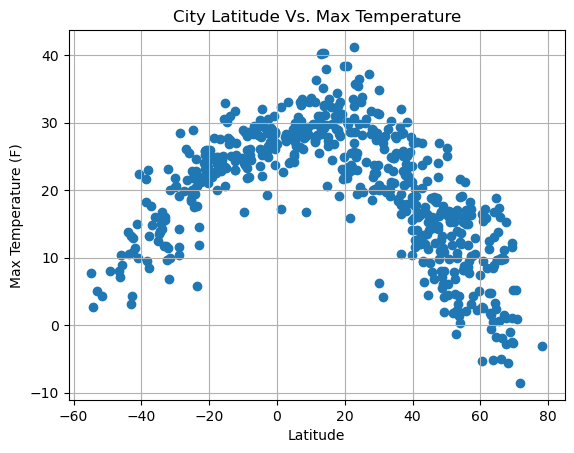

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,max_temps,)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/joyce/Desktop/Homework/api-challenge/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

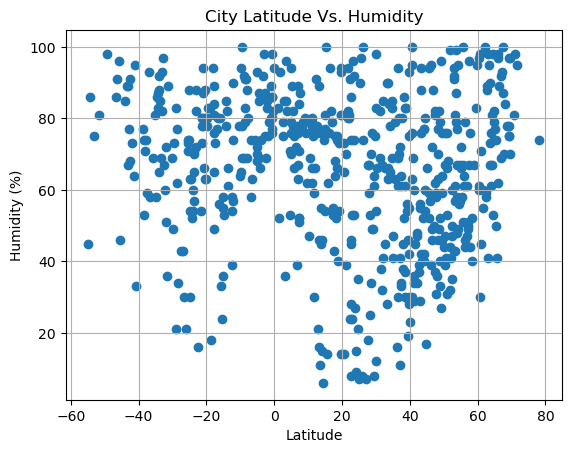

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,humidity)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/joyce/Desktop/Homework/api-challenge/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

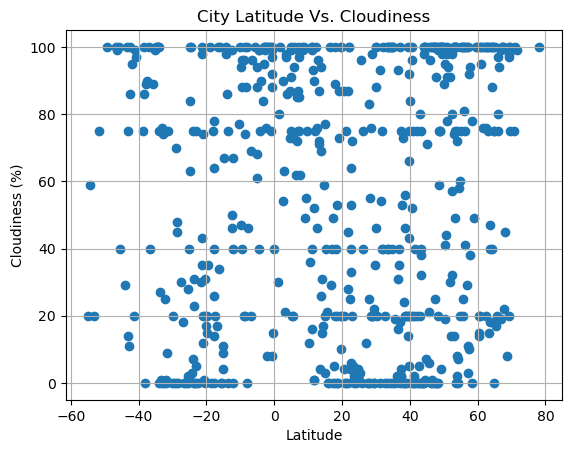

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,cloudiness,)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/joyce/Desktop/Homework/api-challenge/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

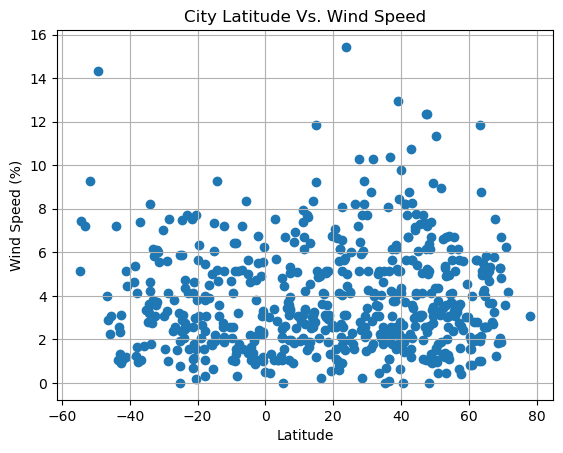

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,wind_speed,)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/joyce/Desktop/Homework/api-challenge/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,al jawf,29.5000,38.7500,31.40,8,22,2.13,SA,1684344205
1,utrik,11.2278,169.8474,27.16,79,99,7.93,MH,1684344205
4,breckenridge,32.7557,-98.9023,29.11,45,0,3.09,US,1684344206
8,bac lieu,9.2850,105.7244,29.29,76,55,5.08,VN,1684344207
9,mexia,31.6799,-96.4822,26.06,67,75,1.79,US,1684344207


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,22.81,74,2,0.79,PN,1684344206
3,ushuaia,-54.8000,-68.3000,7.79,45,20,5.14,AR,1684344085
5,bredasdorp,-34.5322,20.0403,13.88,86,100,2.80,ZA,1684344206
6,west island,-12.1568,96.8225,26.99,74,40,7.20,CC,1684344206
7,soe,-9.8607,124.2840,16.79,94,47,2.06,ID,1684344206


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6506550861897833


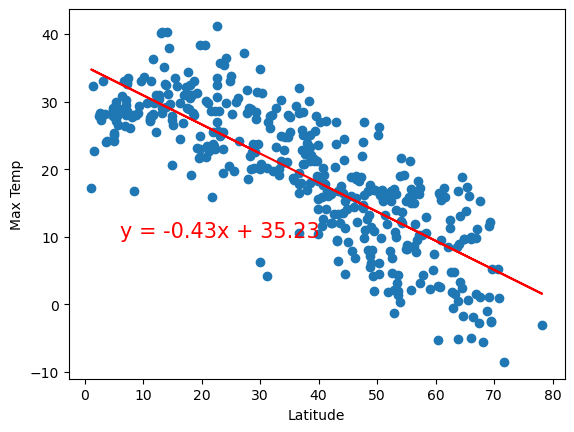

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,10))

The r-value is: 0.6782069880333985


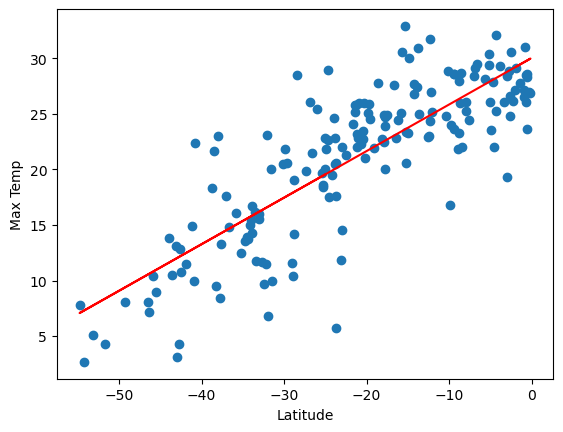

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** In the Northern Hemisphere, it is graphically shown that temperatures decrease steadily when we move away from the equator, and the same result is seen for the Southern Hempisphere. There, temperatures drop as we move away from the equator closer to the south pole. There is a direct relationship between temperature, and distance to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004298371768672144


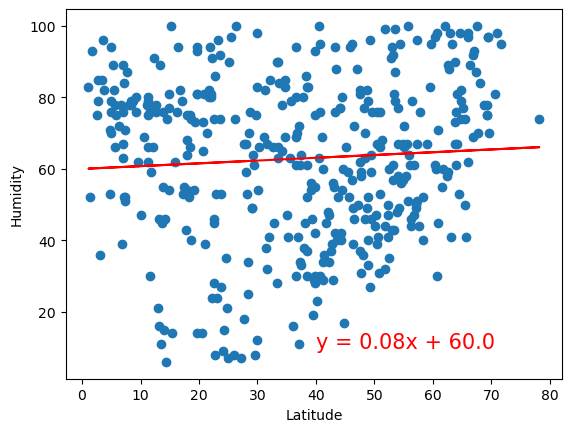

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-value is: 0.011475662058334389


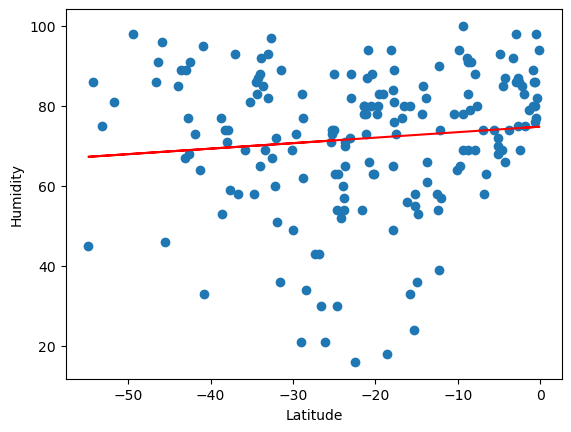

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** Humidity does not seem to show any direct correlation with latitude. In both hemispheres, the scatter plot shows no true line to connect the two variables. Both r-valus are very close to 0, indicating a weak correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00798142189572288


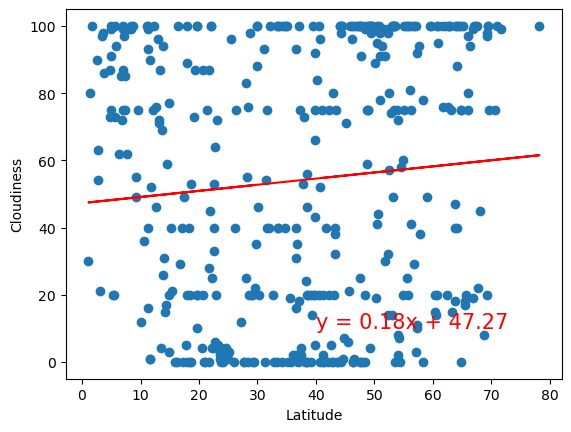

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-value is: 0.016308434594241517


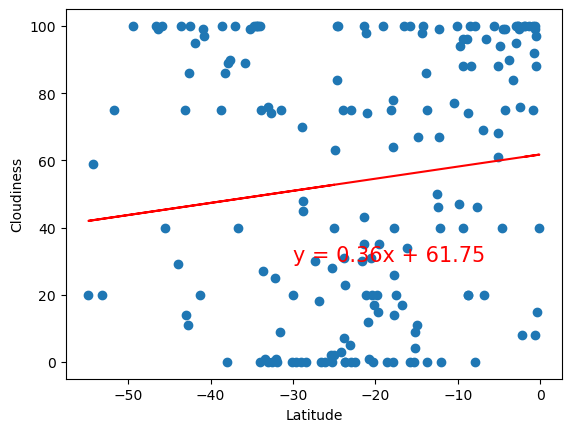

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** It seems there are more instances where the Northern hemisphere experiences cloudiness, but the relationship is weak in regards to the latitude. With an r-value very close to 0, it does not seem to show any relationship between latitude and cloudiness. For the Southern hemisphere, the r-value is greater than the results for the Northern, but it still shows a generally weak relationship between cloudiness and latitude - there is also no direct regression line proving a strong relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0010751333941473571


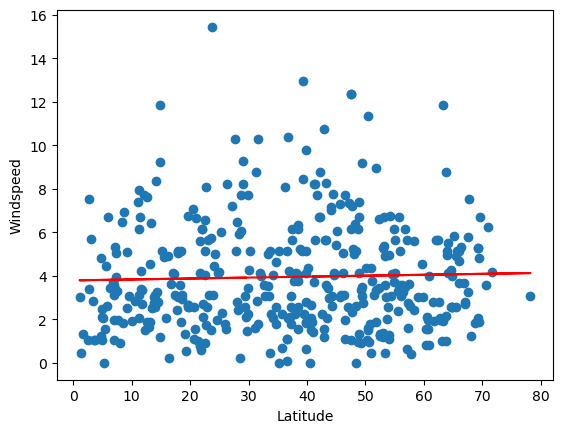

In [46]:
# Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-value is: 0.02968772009308305


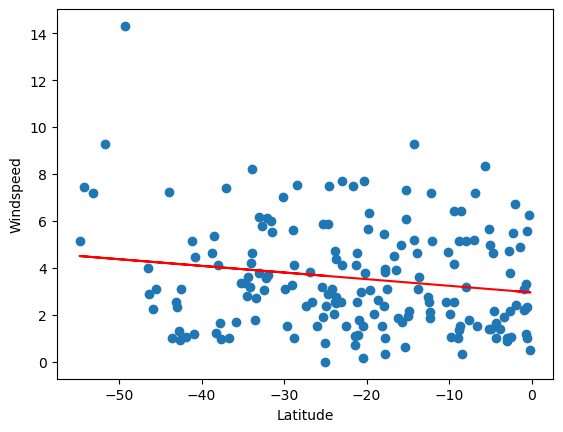

In [51]:
# Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,20))

**Discussion about the linear relationship:** Windspeed in the Northern hemisphere seems to be somewhat similar throughout all latitudes. There is a relatively horizontal line through 4MPH of windspeed, from latitudes 0 to 80.
For the Southern hemisphere, there is also a low r-value indicating a weak relationship between latitude and windspeed. Although it seems like the speed slightly decreases as we move closer to the equator, it is not a strong enough calculation to say that the two variable have a significant association 